# Fitting tests performed on Bagpipes-created spectra using custom CEH based on Yirui's simulations

Following the creation of multiple versions of purely-Bagpipes-created spectra, using custom CEH with SFH and CEH information from Yirui's simulations in notebook `custom_ceh_development.ipynb`, now we fit it with various combinations of models. Starting with the simplest psb2 function on the full CEH model spectrum.

In [1]:
import bagpipes as pipes
# setting bagpipes R_spec to as high as possible for perfect generation of models
pipes.config.R_spec = 4340
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

import sys
sys.path.append('../../..')
from code_bits.fitting import *
from code_bits.add_psbtwin import *
from code_bits.add_ceh_funcs import *

Starting dense_basis. please wait ~ a minute for the FSPS backend to initialize.


In [2]:
fit_obj = fitting('../../..', '../../../Yirui_test_cube/snap119_bagpipes_model/no_dust', 
                  0.04, 1, sky_masking=False, full=True)

In [3]:
# load in true SFH
model_ages, model_sfh = load_model_sfh('../../../Yirui_test_cube/snap119/2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_snap119_SFH_at_diff_radius.txt')

## Fit no.1
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_full_ceh_no_dust_SNR15.csv` <br>
SFH model: psb2 (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

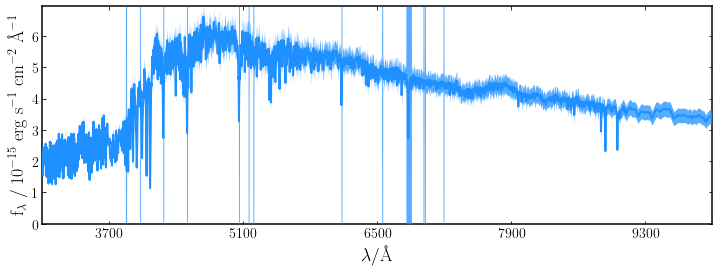

{'psb_wild2020': {'age': (4, 14.0), 'tau': (0.3, 10.0), 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha': (0.01, 1000), 'alpha_prior': 'log_10', 'beta': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [5]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb2 = {}
    psb2["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb2["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
    psb2["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb2["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb2["metallicity_prior"] = "log_10"
    
    psb2["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb2["alpha"] = (0.01,1000)               # decline of burst
    psb2["alpha_prior"] = "log_10"
    psb2["beta"] = 250.                    # rise of burst: fixed
    psb2["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_wild2020'] = psb2
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'full_ceh_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [7]:
pipes.config.Rspec = 4340
runID = "1_full_ceh_no_dust_default_psb2_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object full_ceh_no_dust_SNR15


Completed in 2126.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_wild2020:age               5.747      6.587      7.544
psb_wild2020:alpha           148.490    172.357    236.487
psb_wild2020:burstage          0.476      0.556      0.617
psb_wild2020:fburst            0.072      0.094      0.113
psb_wild2020:massformed       10.834     10.857     10.881
psb_wild2020:metallicity       1.208      1.324      1.436
psb_wild2020:tau               4.460      7.076      9.106
redshift                       0.040      0.040      0.040




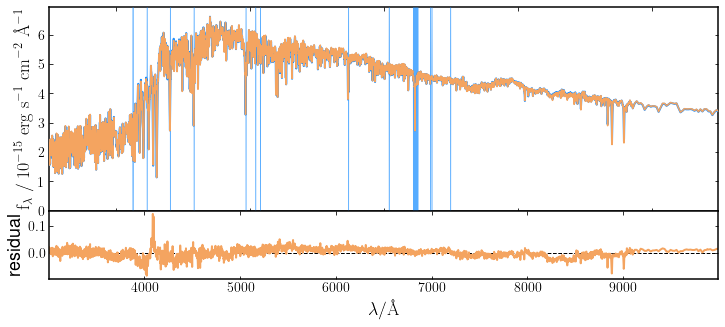

only recovered 0.6751664582669532 of total mass formed.
10.855813038891307 11.026402180142501
model f_burst and t_burst: 0.08993122012854099 12.374068241650054
posterior f_burst and t_burst: [0.07119588 0.09271979 0.11279281] [12.30532357 12.37253415 12.45071679]


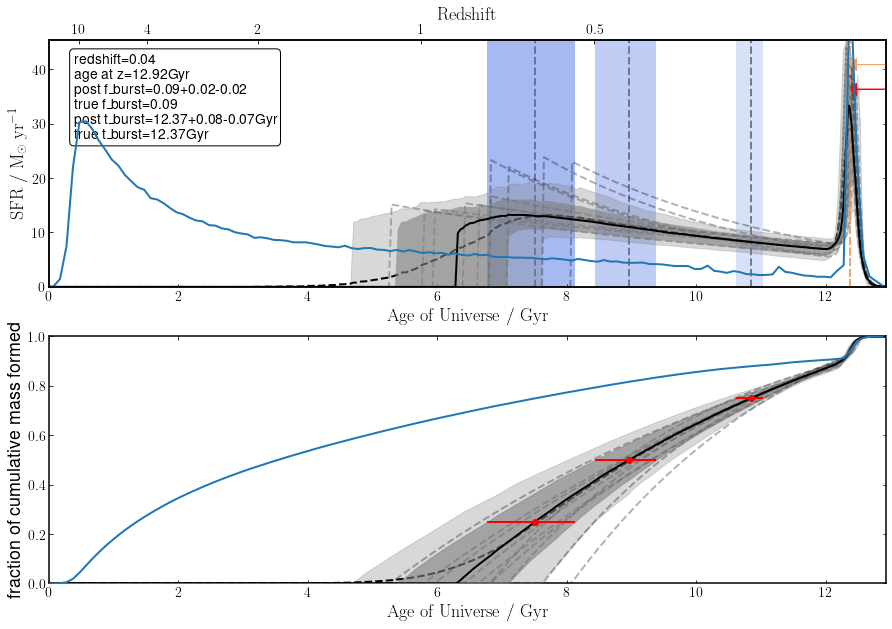

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [7]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: Surprisingly, fburst is recovered to be 0.09, very close to the true. Although mass recovary rate is much higher than previously (was <0.5 typically), this is not due to that, but instead due to a lowered estimation of amount of mass formed during burst. There seems to be strong degeneracies between intermediate and old age contributions, as before.

## Fit no.2
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_full_ceh_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

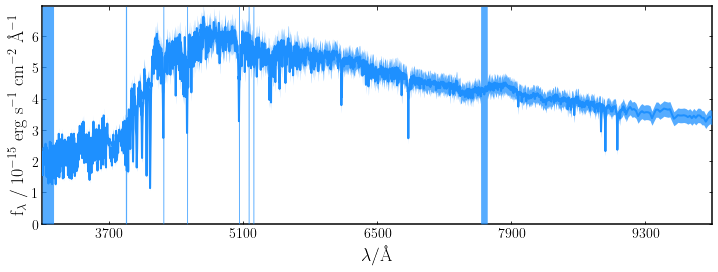

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [13]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb_twin["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_prior"] = "log_10"
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'full_ceh_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [14]:
pipes.config.Rspec = 4340
runID = "2_full_ceh_no_dust_default_psbtwin_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object full_ceh_no_dust_SNR15


Completed in 2053.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   7.002      8.119      9.404
psb_twin:alpha1                0.020      0.072      0.366
psb_twin:alpha2              158.031    186.624    303.120
psb_twin:burstage              0.433      0.525      0.589
psb_twin:fburst                0.054      0.076      0.094
psb_twin:massformed           10.844     10.868     10.892
psb_twin:metallicity           1.189      1.307      1.420
redshift                       0.040      0.040      0.040




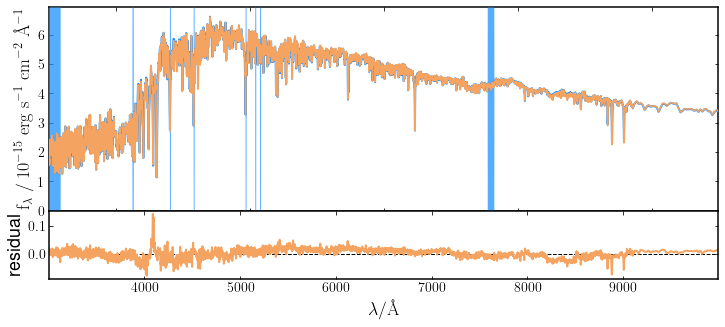

only recovered 0.6942180313628961 of total mass formed.
10.867898069828955 11.0264021801425
model f_burst and t_burst: 0.08642406323648828 12.370557774405906
posterior f_burst and t_burst: [0.05271745 0.0753748  0.09468572] [12.33323072 12.39824713 12.49798008]


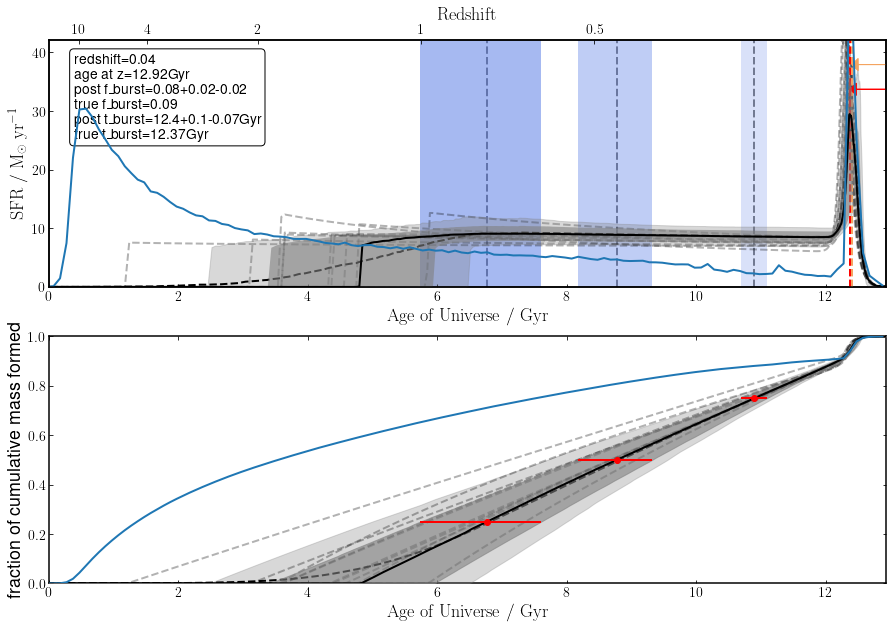

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [15]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: Similar issue as with psb2, but with slightly better total mass recovary. Perhaps the next thing it needs is 2-step metallicity.

## Fit no.3
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_full_ceh_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: 2-step <br>

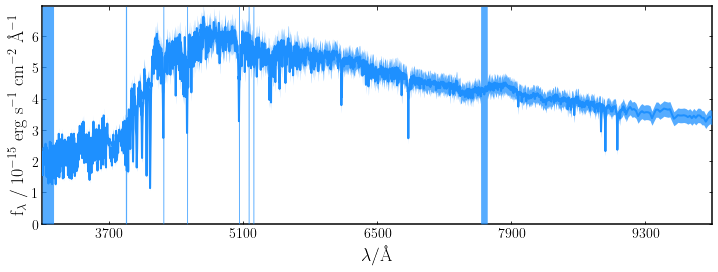

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity_type': 'psb_two_step', 'metallicity_old': (0.01, 2.5), 'metallicity_old_prior': 'log_10', 'metallicity_burst': (0.01, 2.5), 'metallicity_burst_prior': 'log_10', 'metallicity_scatter': 'delta', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [17]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    
    psb_twin["metallicity_type"] = "psb_two_step"
    psb_twin["metallicity_old"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_old_prior"] = "log_10"
    psb_twin["metallicity_burst"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_burst_prior"] = "log_10"
    psb_twin["metallicity_scatter"] = "delta"
    
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'full_ceh_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [18]:
pipes.config.Rspec = 4340
runID = "3_full_ceh_no_dust_default_psbtwin_twostep_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object full_ceh_no_dust_SNR15


Completed in 4640.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   9.053     11.233     12.405
psb_twin:alpha1                0.024      0.120      0.511
psb_twin:alpha2              184.365    207.848    246.816
psb_twin:burstage              0.432      0.474      0.516
psb_twin:fburst                0.052      0.062      0.074
psb_twin:massformed           10.891     10.937     10.961
psb_twin:metallicity_burst      2.004      2.283      2.439
psb_twin:metallicity_old       0.898      0.944      1.145
redshift                       0.040      0.040      0.040




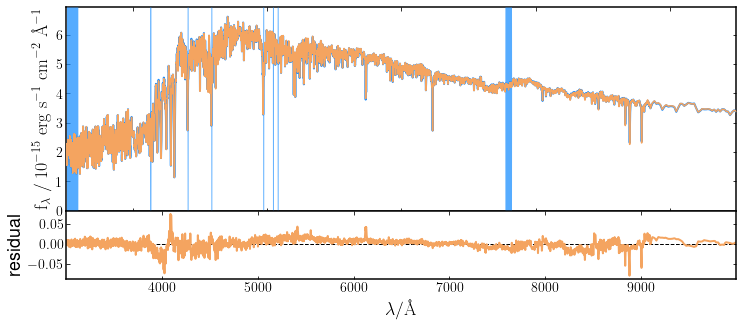

only recovered 0.8153900164709234 of total mass formed.
10.937767569846164 11.0264021801425
model f_burst and t_burst: 0.08642406323648828 12.37055558004304
posterior f_burst and t_burst: [0.05056203 0.06208394 0.07280865] [12.41052194 12.45022844 12.49429398]


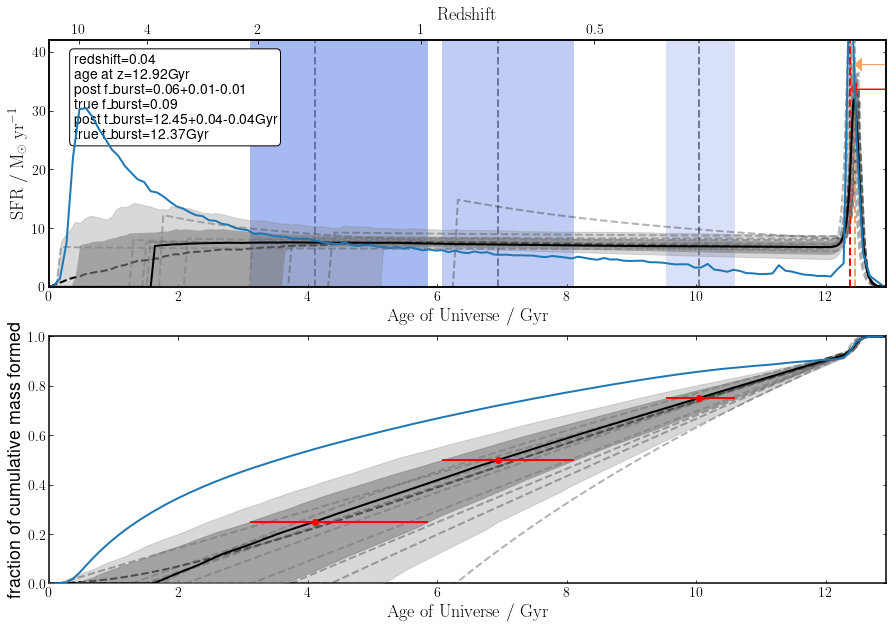

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [19]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: old stellar population extends much further back in time, but SFR at intermediate age is still overestimated. Glad to see the recovary of 2 distinct metallicity values

## Fit no.4
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_full_ceh_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: 2-step + lognorm <br>

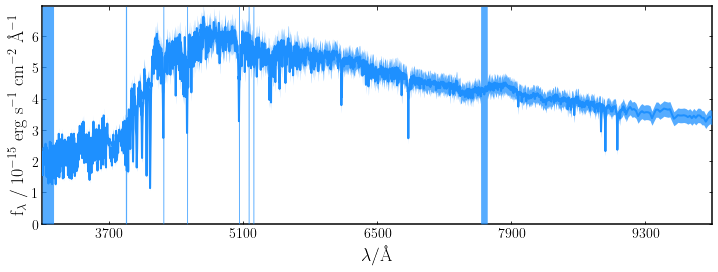

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity_type': 'psb_two_step', 'metallicity_old': (0.01, 2.5), 'metallicity_old_prior': 'log_10', 'metallicity_burst': (0.01, 2.5), 'metallicity_burst_prior': 'log_10', 'metallicity_scatter': 'lognorm', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [20]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    
    psb_twin["metallicity_type"] = "psb_two_step"
    psb_twin["metallicity_old"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_old_prior"] = "log_10"
    psb_twin["metallicity_burst"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_burst_prior"] = "log_10"
    psb_twin["metallicity_scatter"] = "lognorm"
    
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'full_ceh_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [21]:
pipes.config.Rspec = 4340
runID = "4_full_ceh_no_dust_default_psbtwin_twostep_lognorm_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object full_ceh_no_dust_SNR15


Completed in 13029.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   9.119     11.100     12.338
psb_twin:alpha1                0.021      0.098      0.390
psb_twin:alpha2              173.197    193.517    223.594
psb_twin:burstage              0.464      0.505      0.543
psb_twin:fburst                0.063      0.075      0.087
psb_twin:massformed           10.893     10.926     10.946
psb_twin:metallicity_burst      2.020      2.289      2.439
psb_twin:metallicity_old       1.055      1.136      1.245
redshift                       0.040      0.040      0.040




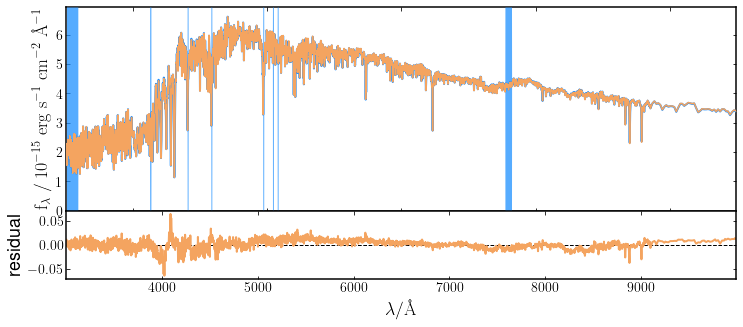

only recovered 0.7954254841387602 of total mass formed.
10.927001681104183 11.026402180142501
model f_burst and t_burst: 0.08642406323648828 12.370558124008385
posterior f_burst and t_burst: [0.06383949 0.07594081 0.08849457] [12.37691055 12.41809138 12.45750271]


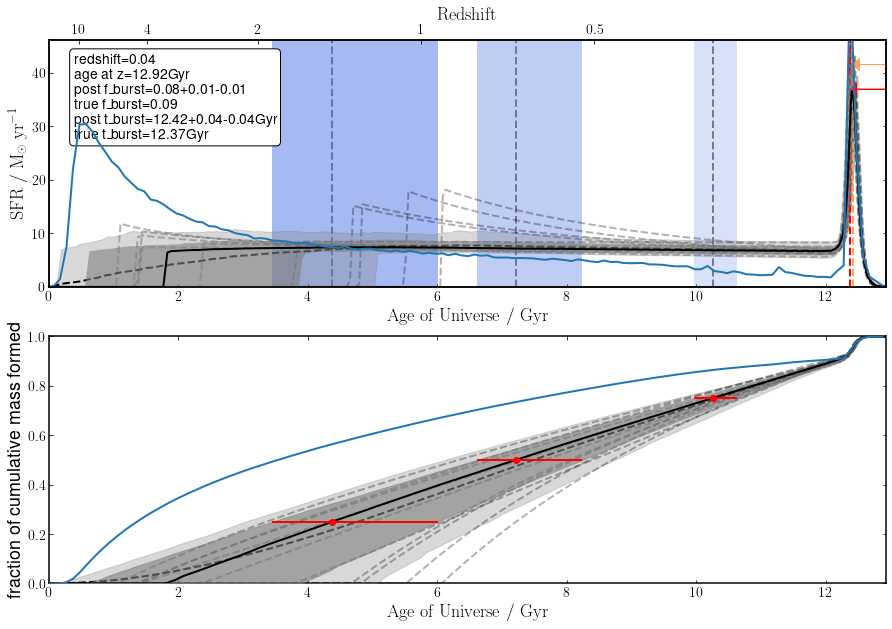

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [22]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: Other than the significantly longer runtime, there is little difference between this and purely two-step

## Fit no.5
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_evolution_only_no_dust_SNR15.csv` <br>
SFH model: psb2 (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

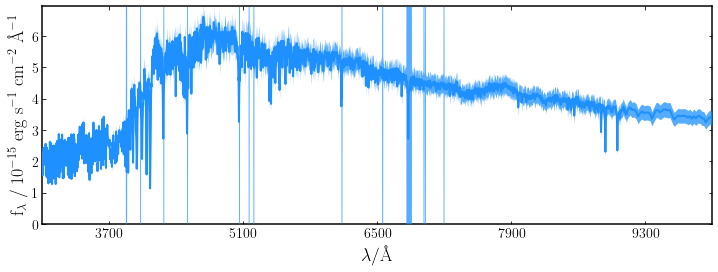

{'psb_wild2020': {'age': (4, 14.0), 'tau': (0.3, 10.0), 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha': (0.01, 1000), 'alpha_prior': 'log_10', 'beta': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [97]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb2 = {}
    psb2["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb2["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
    psb2["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb2["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb2["metallicity_prior"] = "log_10"
    
    psb2["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb2["alpha"] = (0.01,1000)               # decline of burst
    psb2["alpha_prior"] = "log_10"
    psb2["beta"] = 250.                    # rise of burst: fixed
    psb2["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_wild2020'] = psb2
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'evolution_only_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [98]:
pipes.config.Rspec = 4340
runID = "5_evolution_only_no_dust_default_psb2_bin_by_1_4340_Rspec2"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object evolution_only_no_dust_SNR15


Completed in 2091.5 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_wild2020:age               6.230      7.291      8.456
psb_wild2020:alpha           152.960    174.059    214.438
psb_wild2020:burstage          0.499      0.562      0.613
psb_wild2020:fburst            0.084      0.099      0.116
psb_wild2020:massformed       10.864     10.886     10.911
psb_wild2020:metallicity       1.230      1.351      1.466
psb_wild2020:tau               3.104      6.117      8.715
redshift                       0.040      0.040      0.040




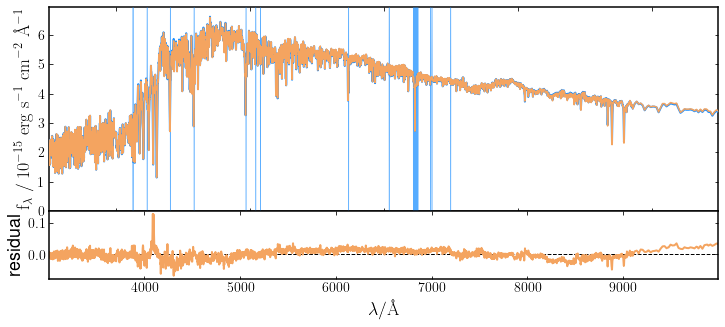

only recovered 0.7229491689102724 of total mass formed.
10.885509942944863 11.0264021801425
model f_burst and t_burst: 0.08993122012854099 12.374071446919448
posterior f_burst and t_burst: [0.08326669 0.09902799 0.11409824] [12.31511682 12.36544758 12.43020648]


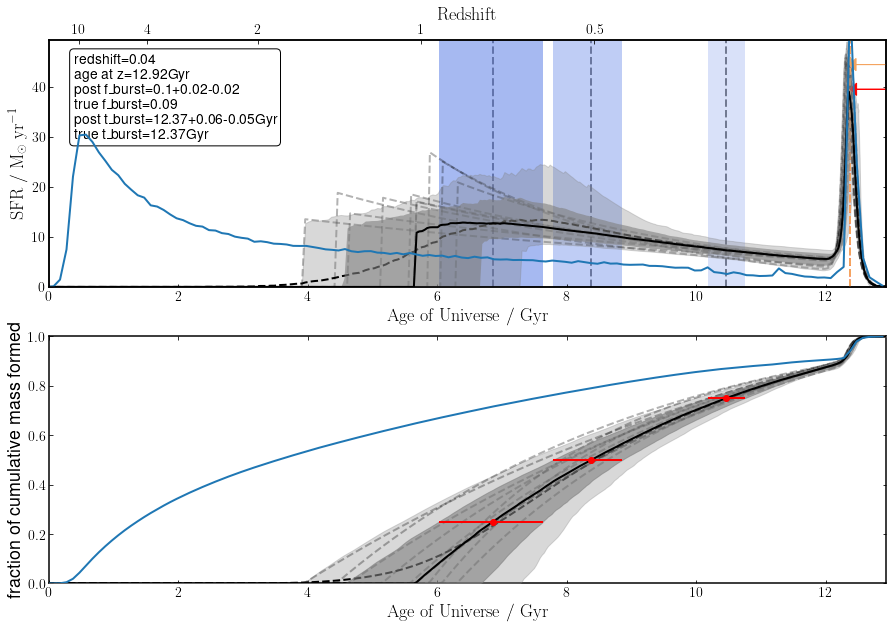

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [99]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: As bad as fit 1, fburst is even badly underestimated

## Fit no.6
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_evolution_only_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

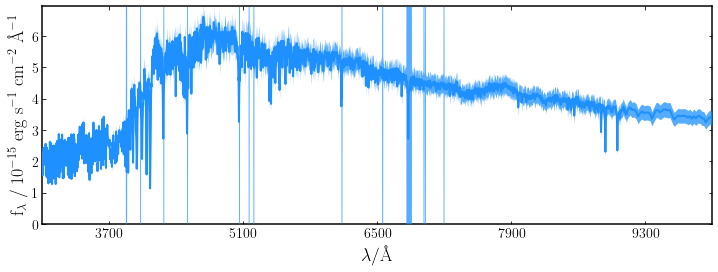

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [101]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb_twin["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_prior"] = "log_10"
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'evolution_only_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [102]:
pipes.config.Rspec = 4340
runID = "6_evolution_only_no_dust_default_psbtwin_bin_by_1_4340_Rspec2"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object evolution_only_no_dust_SNR15


Completed in 2336.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   7.105      9.055     10.812
psb_twin:alpha1                0.021      0.131      1.653
psb_twin:alpha2              161.053    185.040    250.697
psb_twin:burstage              0.462      0.536      0.587
psb_twin:fburst                0.065      0.084      0.102
psb_twin:massformed           10.872     10.896     10.920
psb_twin:metallicity           1.240      1.356      1.472
redshift                       0.040      0.040      0.040




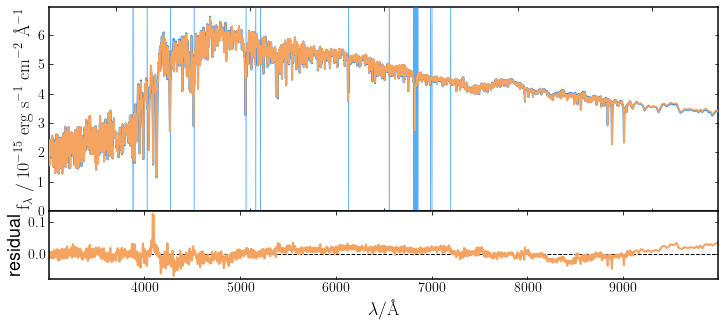

only recovered 0.7409378789810042 of total mass formed.
10.896183977937355 11.0264021801425
model f_burst and t_burst: 0.08642406323648828 12.370563033219494
posterior f_burst and t_burst: [0.06782497 0.0849245  0.10364662] [12.33382612 12.38813216 12.45132076]


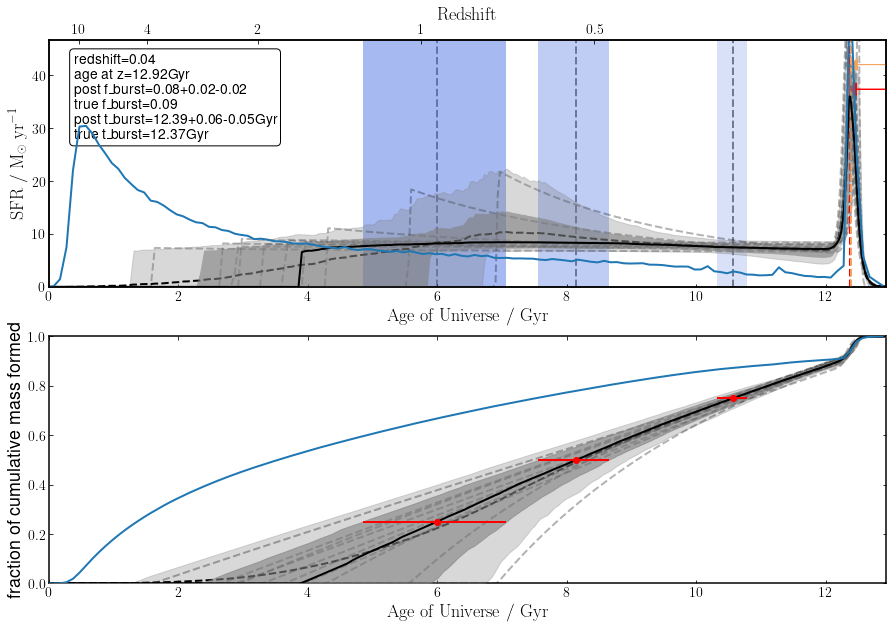

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [103]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: little difference in terms of outshining, putting on 2step next

## Fit no.7
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_evolution_only_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: psb_two_step <br>

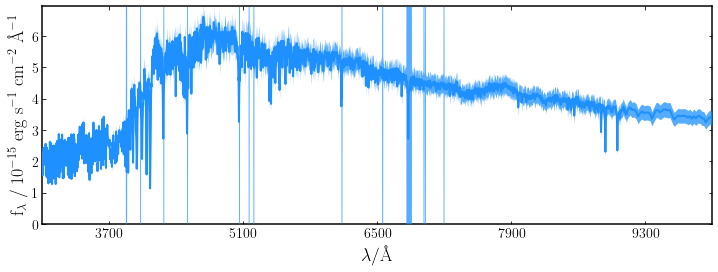

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity_type': 'psb_two_step', 'metallicity_old': (0.01, 2.5), 'metallicity_old_prior': 'log_10', 'metallicity_burst': (0.01, 2.5), 'metallicity_burst_prior': 'log_10', 'metallicity_scatter': 'delta', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [104]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    
    psb_twin["metallicity_type"] = "psb_two_step"
    psb_twin["metallicity_old"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_old_prior"] = "log_10"
    psb_twin["metallicity_burst"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_burst_prior"] = "log_10"
    psb_twin["metallicity_scatter"] = "delta"
    
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'evolution_only_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [105]:
pipes.config.Rspec = 4340
runID = "7_evolution_only_no_dust_default_psbtwin_twostep_bin_by_1_4340_Rspec2"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object evolution_only_no_dust_SNR15


Completed in 4216.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   9.720     11.135     12.254
psb_twin:alpha1                0.024      0.127      0.528
psb_twin:alpha2              195.354    222.719    277.998
psb_twin:burstage              0.419      0.457      0.501
psb_twin:fburst                0.055      0.064      0.074
psb_twin:massformed           10.909     10.935     10.963
psb_twin:metallicity_burst      1.938      2.243      2.424
psb_twin:metallicity_old       0.958      1.115      1.272
redshift                       0.040      0.040      0.040




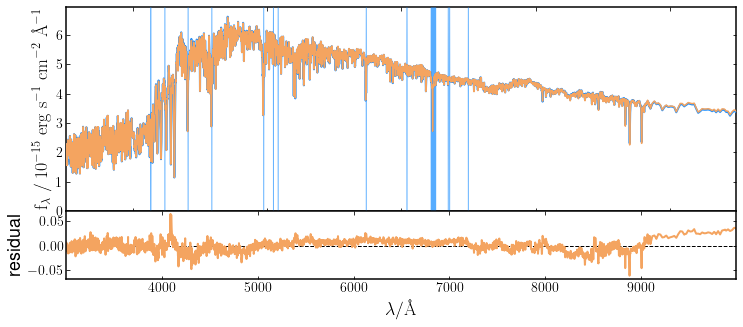

only recovered 0.8071430213225691 of total mass formed.
10.933352676286859 11.0264021801425
model f_burst and t_burst: 0.08642406323648828 12.370555990543455
posterior f_burst and t_burst: [0.05499475 0.06315372 0.0739686 ] [12.42162994 12.46930224 12.50721906]


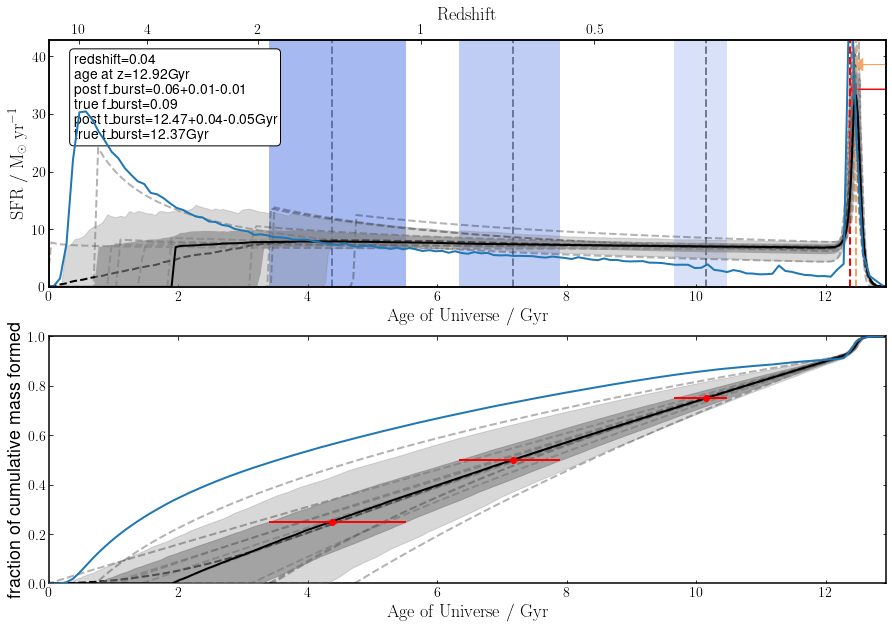

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [106]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: Strange posterior best fit values for metallicity, need to look further into this... Could this be due to the different EM masking scheme used?

## Fit no.8
(Same as 7 but with the older EM masking scheme)
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_evolution_only_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: psb_two_step <br>

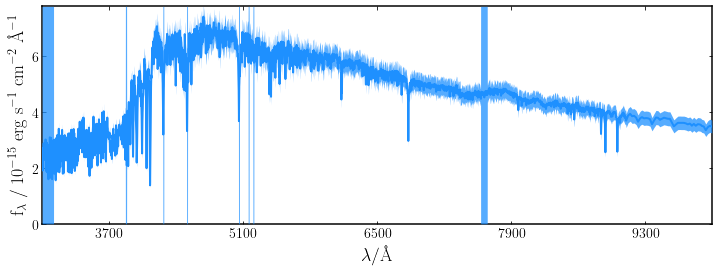

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity_type': 'psb_two_step', 'metallicity_old': (0.01, 2.5), 'metallicity_old_prior': 'log_10', 'metallicity_burst': (0.01, 2.5), 'metallicity_burst_prior': 'log_10', 'metallicity_scatter': 'delta', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [20]:
# repeat but with old masking
def mask_em(wave):
    """ from maskem.pro OII, Hgama, Hbeta, OIII, OIII: Vacuum """

    
    lines_vac = np.array([3727.092,3729.875,4102.892, 4341.692,4862.683,4960.295,5008.24])
    lines = pyasl.vactoair2(lines_vac)
    
    mask = []
    for i in range(lines.shape[0]):
        masksize = 5

        ind = np.where((wave>lines[i]-masksize) & (wave<lines[i]+masksize))
        mask.extend(ind[0])

    # MgII  2796.352 ,2803.531 
    #ind = np.where((wave>2766.4) & (wave<2833.5))

    # remove everything bluewards of 3000A
    ind = np.where(wave<3000)
    mask.extend(ind[0])    

    return mask

def load_uds_spectrum_mask(ID,z):

    # load spectral data
    spectrum = np.loadtxt(fname='../../../Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_'+
                          ID+".csv", delimiter=',', skiprows=1)

    spectrum[:,1] *= 10**-16
    spectrum[:,2] *= 10**-16

    # blow up the errors associated with any bad points in the spectrum and photometry
    for i in range(len(spectrum)):
        if spectrum[i,1] == 0 or spectrum[i,2] <= 0:
            spectrum[i,1] = 0.
            spectrum[i,2] = 9.9*10**99.
    
    # nebular emission lines and interstellar absorption lines
    mask = mask_em(spectrum[:,0]/(1+z))
    spectrum[mask, 2] = 9.9*10**99.
    
    # O2 telluric
    mask = ((spectrum[:,0] > 7580.) & (spectrum[:,0] < 7650.))
    spectrum[mask, 2] = 9.9*10**99.

    #return bin(spectrum,4)
    return spectrum
    

def load_uds_mask(ID):
    z = 0.04
    spectrum = load_uds_spectrum_mask(ID,z)

    return spectrum

ID = 'evolution_only_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, load_uds_mask, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)


In [21]:
pipes.config.Rspec = 4340
runID = "8_evolution_only_no_dust_default_psbtwin_twostep_bin_by_1_4340_Rspec_oldmasking"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object evolution_only_no_dust_SNR15


Completed in 5448.3 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   6.766      7.569      8.447
psb_twin:alpha1                0.020      0.079      0.381
psb_twin:alpha2              470.421    675.278    864.972
psb_twin:burstage              0.433      0.442      0.452
psb_twin:fburst                0.051      0.055      0.060
psb_twin:massformed           10.841     10.860     10.879
psb_twin:metallicity_burst      0.017      0.037      0.090
psb_twin:metallicity_old       0.769      0.805      0.838
redshift                       0.040      0.040      0.040




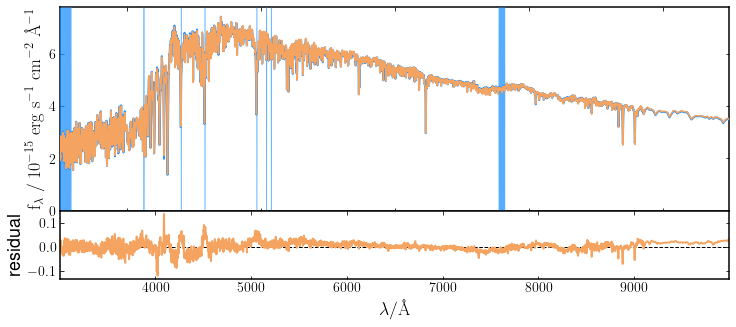

only recovered 0.6822648549601109 of total mass formed.
10.860355180485858 11.026402180142501
model f_burst and t_burst: 0.08642406323648828 12.370564279608905
posterior f_burst and t_burst: [0.05112464 0.05519563 0.05946164] [12.47305419 12.48160355 12.49175861]


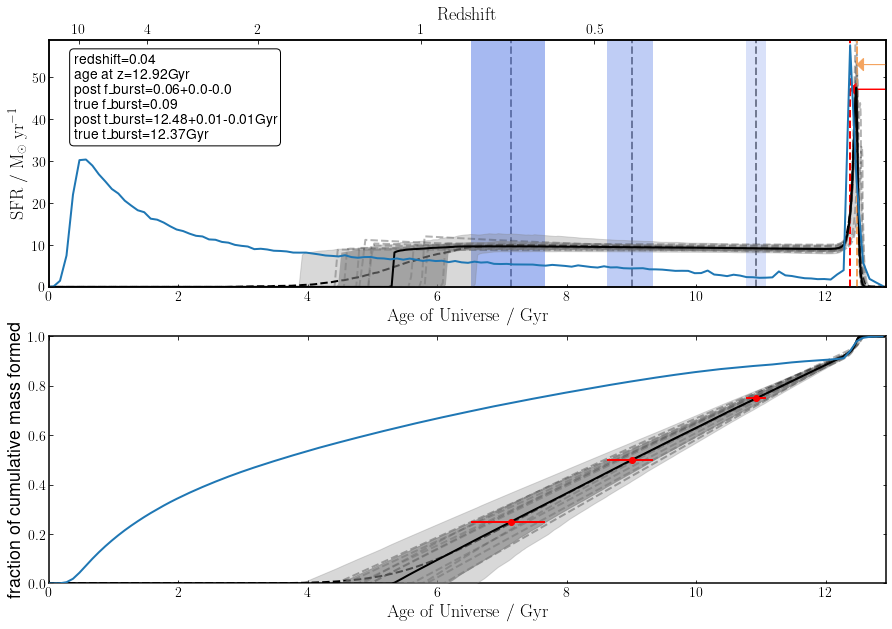

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [22]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: Hmm almost no difference... Need to look into the code that created this spectrum

## Fit no.9
(Swapping to fitting baseline: uniformZ at assumed solar metallicity, only custom SFH left as only model-data mismatch, aim to compare between psb2 and psb_twin) <br>
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_uniformZ_no_dust_SNR15.csv` <br>
SFH model: psb2 (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

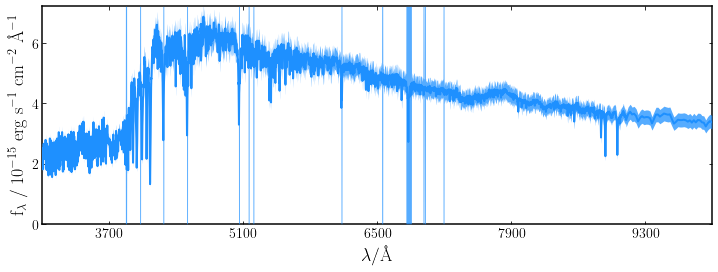

{'psb_wild2020': {'age': (4, 14.0), 'tau': (0.3, 10.0), 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha': (0.01, 1000), 'alpha_prior': 'log_10', 'beta': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [90]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb2 = {}
    psb2["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb2["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
    psb2["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb2["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb2["metallicity_prior"] = "log_10"
    
    psb2["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb2["alpha"] = (0.01,1000)               # decline of burst
    psb2["alpha_prior"] = "log_10"
    psb2["beta"] = 250.                    # rise of burst: fixed
    psb2["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_wild2020'] = psb2
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'uniformZ_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [91]:
pipes.config.Rspec = 4340
runID = "9_uniformZ_no_dust_default_psb2_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object uniformZ_no_dust_SNR15


Completed in 2075.8 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_wild2020:age              10.149     11.542     12.514
psb_wild2020:alpha           173.920    200.780    253.466
psb_wild2020:burstage          0.447      0.493      0.533
psb_wild2020:fburst            0.080      0.088      0.096
psb_wild2020:massformed       10.978     10.997     11.017
psb_wild2020:metallicity       1.021      1.098      1.196
psb_wild2020:tau               3.329      5.084      7.239
redshift                       0.040      0.040      0.040




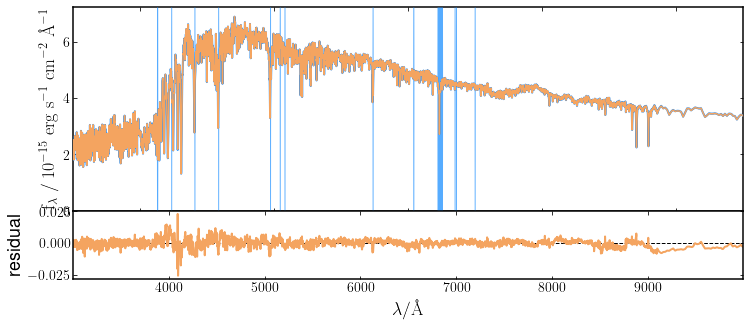

only recovered 0.9351099664775314 of total mass formed.
10.997264865909326 11.0264021801425
model f_burst and t_burst: 0.08993122012854099 12.374070611535616
posterior f_burst and t_burst: [0.08038799 0.08817744 0.09621451] [12.38877975 12.43008348 12.47604103]


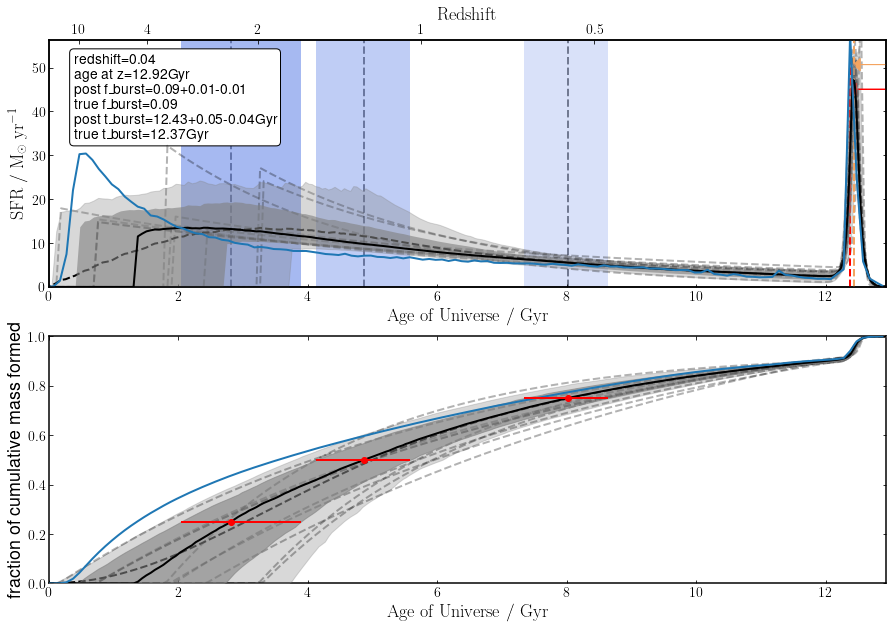

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [92]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)

Comments: That was pretty good, need to compare with results from psb_twin

## Fit no.10
Spectrum: `Yirui_test_cube/snap119_bagpipes_model/no_dust/Spectrum_uniformZ_no_dust_SNR15.csv` <br>
SFH model: psb_twin (age prior: uniform, 4-14 lb time)<br>
CEH model: delta <br>

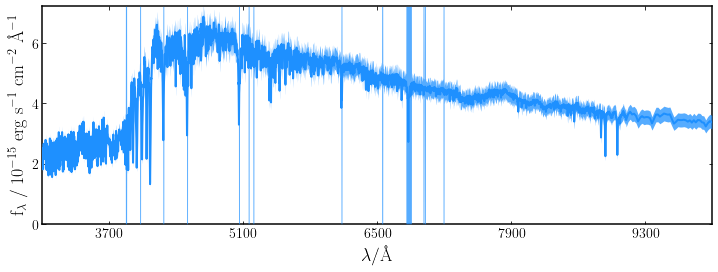

{'psb_twin': {'age': (4, 14.0), 'alpha1': (0.01, 5), 'alpha1_prior': 'log_10', 'beta1': 1000, 'massformed': (6, 13), 'metallicity': (0.01, 2.5), 'metallicity_prior': 'log_10', 'burstage': (0, 2), 'alpha2': (0.01, 1000), 'alpha2_prior': 'log_10', 'beta2': 250.0, 'fburst': (0, 1)}, 'redshift': (0.032, 0.048)}


In [93]:
def get_fit_instructions(z=0.04):
    """ Set up the desired fit_instructions dictionary. """
    
    psb_twin = {}
    psb_twin["age"] = (4, 14.)                     # Vary age between 4 Myr and 14 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.
    psb_twin["alpha1"] = (0.01,5)
    psb_twin["alpha1_prior"] = "log_10"
    psb_twin["beta1"] = 1000
    psb_twin["massformed"] = (6, 13)              # vary log_10(M*/M_solar) between 1 and 15
    psb_twin["metallicity"] = (0.01, 2.5)           # vary Z between 0.1 and 2.5 Z_solar
    psb_twin["metallicity_prior"] = "log_10"
    psb_twin["burstage"] = (0,2)                   # age of burst from 0 to 2Gyr
    psb_twin["alpha2"] = (0.01,1000)               # decline of burst
    psb_twin["alpha2_prior"] = "log_10"
    psb_twin["beta2"] = 250.                    # rise of burst: fixed
    psb_twin["fburst"] = (0,1)
    
    fit_instructions = {}
    fit_instructions['psb_twin'] = psb_twin
    fit_instructions['redshift'] = (z-0.2*z, z+0.2*z)
    
    return fit_instructions

ID = 'uniformZ_no_dust_SNR15'
z = 0.04

galaxy = pipes.galaxy(ID, fit_obj.load_manga_spec, photometry_exists=False)

fig = galaxy.plot()

fit_instructions = get_fit_instructions()
print(fit_instructions)

In [95]:
pipes.config.Rspec = 4340
runID = "10_uniformZ_no_dust_default_psbtwin_bin_by_1_4340_Rspec"
fit = pipes.fit(galaxy, fit_instructions, run=runID)

fit.fit(verbose=False)


Bagpipes: fitting object uniformZ_no_dust_SNR15


Completed in 1284.7 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
psb_twin:age                   9.447     10.794     12.024
psb_twin:alpha1                0.708      1.365      2.413
psb_twin:alpha2              188.941    221.104    375.983
psb_twin:burstage              0.403      0.471      0.508
psb_twin:fburst                0.073      0.084      0.093
psb_twin:massformed           10.970     10.989     11.006
psb_twin:metallicity           1.039      1.117      1.228
redshift                       0.040      0.040      0.040




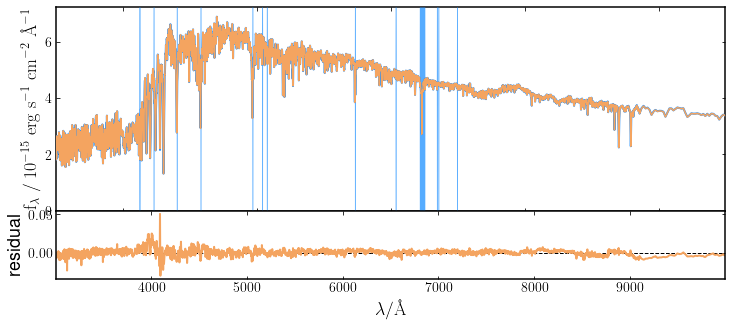

only recovered 0.9170523681145045 of total mass formed.
10.988796316830811 11.0264021801425
model f_burst and t_burst: 0.08642406323648828 12.370561254957233
posterior f_burst and t_burst: [0.07278257 0.08436818 0.09374861] [12.41667268 12.45198046 12.52333879]


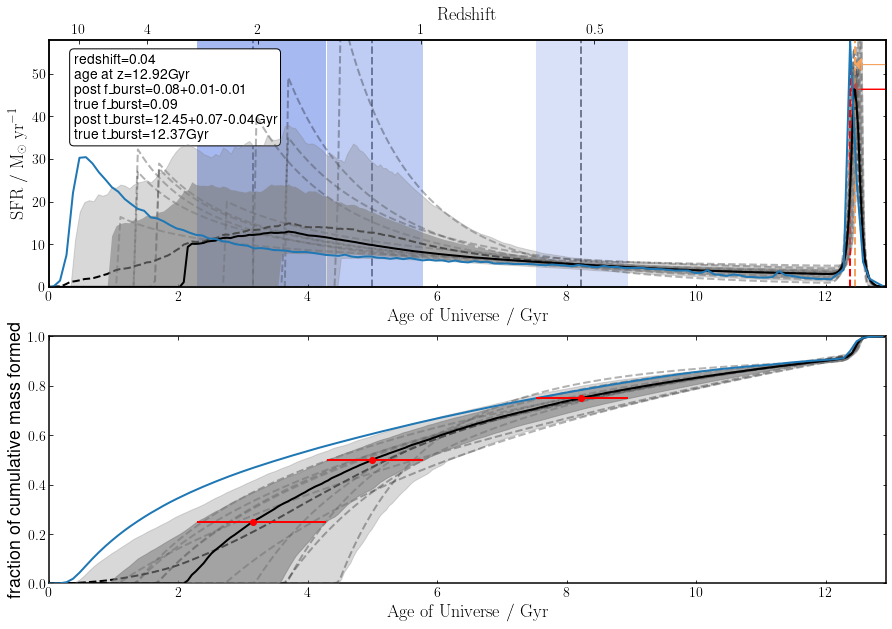

(<Figure size 1080x720 with 3 Axes>,
 array([<AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='$\\mathrm{SFR\\ /\\ M_\\odot\\ \\mathrm{yr}^{-1}}$'>,
        <AxesSubplot:xlabel='$\\mathrm{Age\\ of\\ Universe\\ /\\ Gyr}$', ylabel='fraction of cumulative mass formed'>],
       dtype=object))

In [96]:
plot_spec(fit, ID, runID)
fig = fit.plot_corner(save=True, show=True)
plot_sfh(fit, model_ages, model_sfh, ID, runID, samples=10, plot_mean=True, ninty_region=True)